> # **Weights Initialization Analysis**
> Proper weight initialization is like ensuring all the parts of a complex machine are set up correctly from the start <br><br>
> 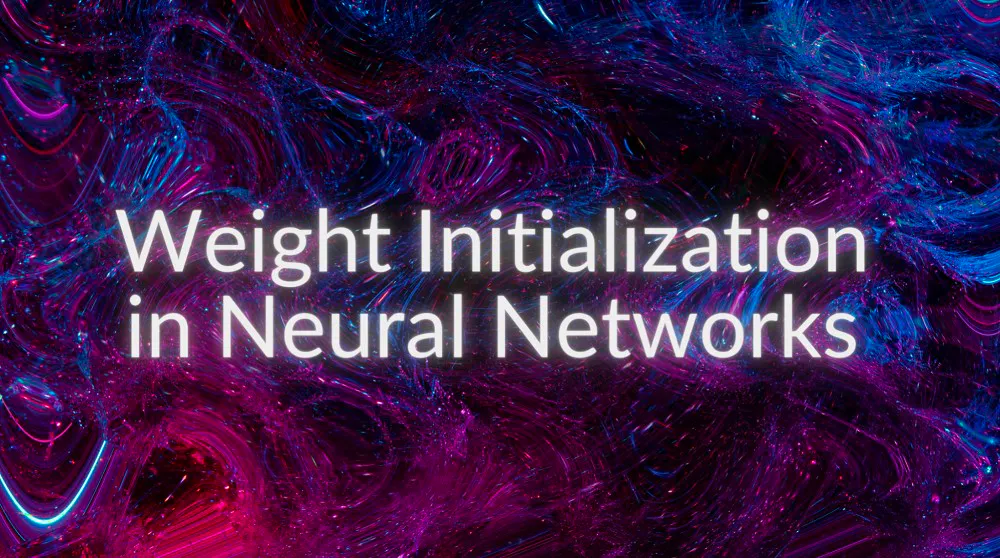
> ## Why Proper Initialization Matters ? 
> Gradient Flow and Training Speed
Neural networks learn by adjusting their weights based on the gradient of the loss function. If the weights are not initialized properly, it can disrupt this learning process:
> - `Vanishing Gradients`: If weights are too small, the gradients (updates) during training can become tiny, causing the network to learn very slowly. It’s like trying to push a car with an almost imperceptible force—progress will be extremely slow.
> - `Exploding Gradients`: Conversely, if weights are too large, gradients can become excessively large, which can make the network’s training process unstable. This is like pushing a car with too much force, making it uncontrollable and erratic.

> ## Advantages:
> - Improving Convergence Rates: The network learns faster and more effectively.
Avoiding Training Instabilities: Prevents issues like vanishing or exploding gradients.<br>
> - Ensuring Effective Activation: Helps activation functions operate in their optimal range.

> Lets start with `what are the Problematic Weight Initialization Techniques ?`

<hr>

> # **Problematic Weight Initialization Techniques 🙅🏻‍♂️**
> 1. **Zero Initialization:** Setting all the initial weights in the network to zero.
> 2. **Constant Value Initialization:** Using the same constant value for all weights across the network.
> 3. **Unscaled Random Value Initialization:** Assigning random values to weights without appropriate scaling based on the number of neurons.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense

In [2]:
X, y = make_moons(
    n_samples = 500,
    noise = 0.2,
    random_state = 42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

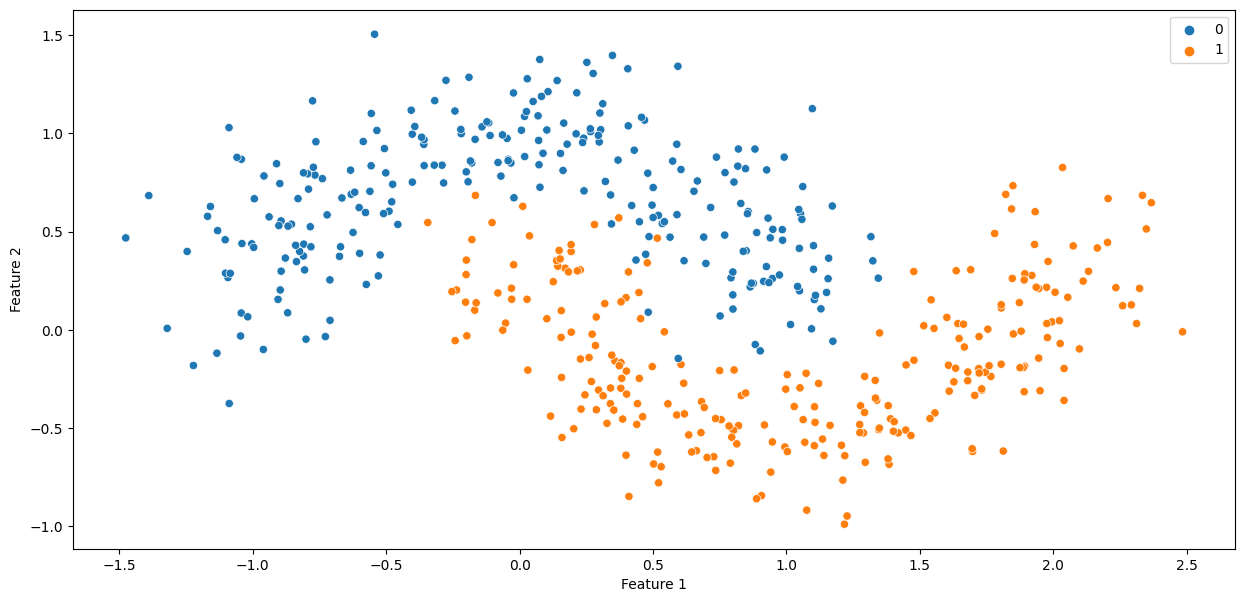

In [3]:
plt.figure(figsize = (15, 7))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

<hr>

> ## **Zero Initialization**
> Initializing all weights to zero can have different effects depending on the activation function used:<br>
> 1. **Sigmoid Activation:**
>    - **Effect:** All neurons in the same layer will output the same value, leading to the same gradients during backpropagation. This symmetry prevents the network from learning effectively, as each neuron fails to learn different features and the gradients become ineffective for training.
<br><br>
> 2. **Tanh Activation:**
>    - **Effect:** Similar to the sigmoid function, zero initialization will cause all neurons in a layer to produce the same output and gradients. This results in a lack of diversity in learning among neurons and impedes the network's ability to capture varied features in the data.
<br><br>
> 3. **ReLU Activation:**
>   - **Effect:** Zero initialization can be particularly problematic with ReLU (Rectified Linear Unit) activation functions because ReLU outputs zero for all negative inputs. If weights are initialized to zero, all the inputs to the ReLU functions will also be zero, causing many neurons to be inactive (outputting zero) and effectively not contributing to learning. This leads to a situation where the network can become very sparse in its activations and learning is severely hindered.

> ### USING `tanh` ACTIVATION FUNCTION

In [4]:
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(units = 2, activation='tanh'))
model.add(Dense(units = 1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.get_weights()

[array([[-0.8453994,  0.817243 ],
        [-0.6463317,  0.7562474]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 1.2003254 ],
        [-0.98300207]], dtype=float32),
 array([0.], dtype=float32)]

In [6]:
initial_weights = model.get_weights()

initial_weights[0] = np.ones(model.get_weights()[0].shape)*0
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0

model.set_weights(initial_weights)
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [7]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2, verbose = 0)

model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.05026701], dtype=float32)]

> For tanh and ReLU activations, initializing all weights to zero results in all weights remaining zero and the neurons failing to activate or learn effectively.

28125/28125 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step


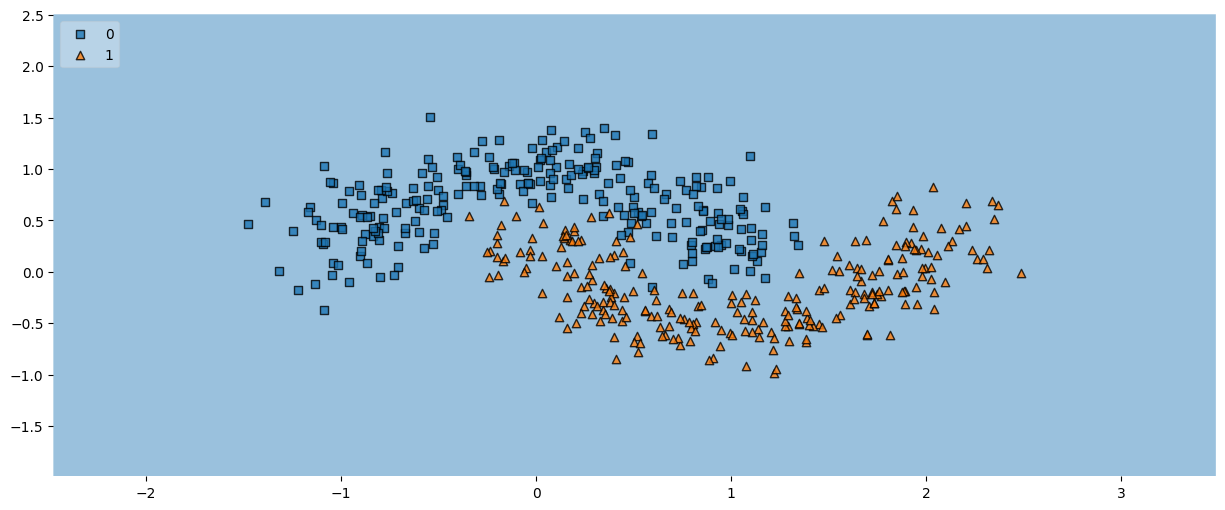

In [8]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize = (15, 6))
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)
plt.show()

> Due to zero weight initialization, there is no convergence, resulting in predictions that are essentially random.
<br>
<hr>

> ### USING `SIGMOID` ACTIVATION FUNCTION

In [9]:
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(units = 2, activation='sigmoid'))
model.add(Dense(units = 1, activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
initial_weights = model.get_weights()

initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

model.set_weights(initial_weights)
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2, verbose = 0)

model.get_weights()

[array([[-1.4852657, -1.4852657],
        [ 1.8599371,  1.8599371]], dtype=float32),
 array([-0.17046832, -0.17046832], dtype=float32),
 array([[-1.0236754],
        [-1.0236754]], dtype=float32),
 array([0.5594057], dtype=float32)]

28125/28125 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step


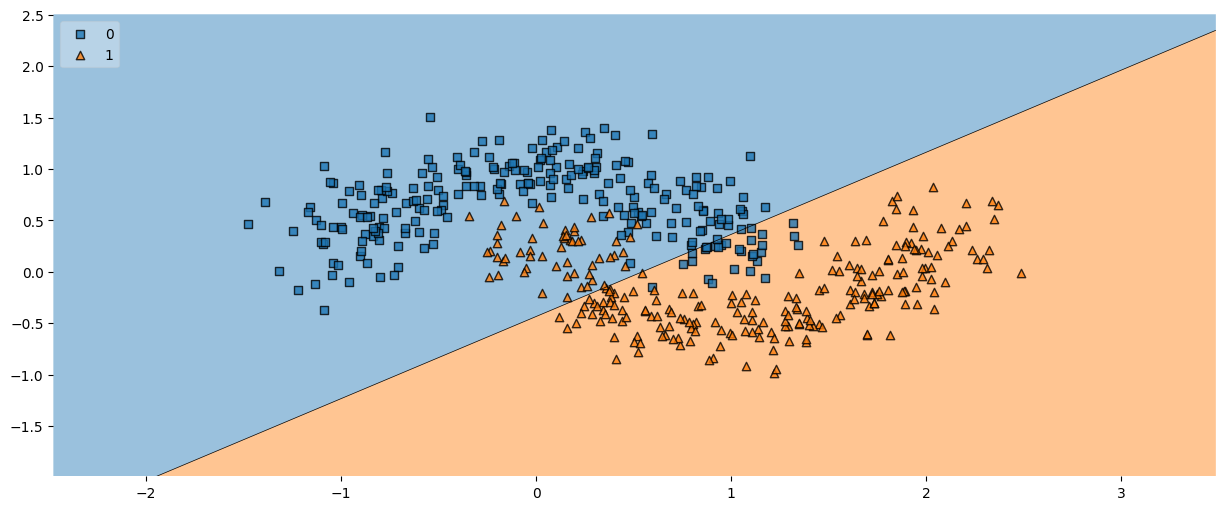

In [12]:
plt.figure(figsize = (15, 6))
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)
plt.show()

> In the case of sigmoid activation, although the weights will eventually be updated, the initial zero initialization causes all neurons to behave identically, just like a simple perceptron, which prevents the network from learning diverse features and only limited to linear classification
<br>
<hr>

> ## **Constant Value Initialization**
> This approach involves setting all weights to the same constant value, like 0.1 or 0.5, across the network.
<br><br>
> Why It’s a Problem: Similar to zero initialization, setting all weights to a constant value doesn’t break the symmetry between neurons. This means that during training, all neurons will continue to update in the same way, which again prevents the network from learning varied and useful features.

In [13]:
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(2,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.get_weights()

[array([[ 1.1629132 , -0.7483718 ],
        [ 0.10896409,  0.44206142]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.19728029],
        [-0.43243742]], dtype=float32),
 array([0.], dtype=float32)]

In [15]:
initial_weights = model.get_weights()

initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

model.set_weights(initial_weights)
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2, verbose = 0)

model.get_weights()

[array([[ 0.6950468,  0.6950468],
        [-0.7587179, -0.7587179]], dtype=float32),
 array([-0.22918914, -0.22918914], dtype=float32),
 array([[1.0356481],
        [1.0356481]], dtype=float32),
 array([-0.06195958], dtype=float32)]

28125/28125 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step


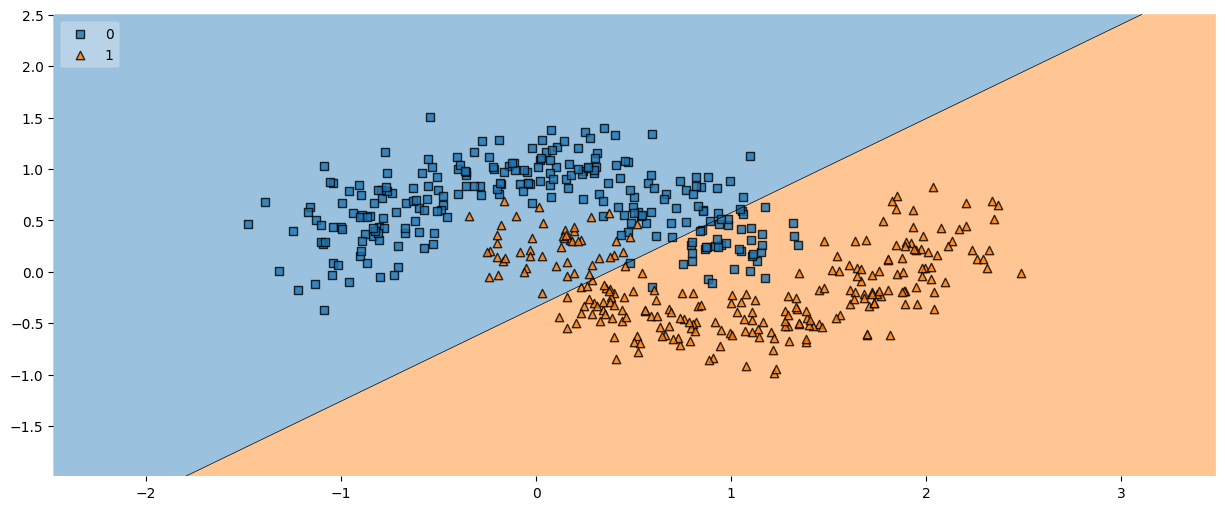

In [17]:
plt.figure(figsize = (15, 6))
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)
plt.show()

> The weights will eventually be updated, the initial constant initialization causes all neurons to behave identically, just like a simple perceptron, which prevents the network from learning diverse features and only limited to linear classification
<br>
<hr>

> ## Random Initialization
> Here, weights are initialized with random values, but without any specific scaling or consideration for the number of neurons in the layer.
<br><br>
> Why It’s a Problem: Random initialization can introduce a lot of variability, but if the random values are too large or too small, they can lead to problems. Large random weights can cause exploding gradients, making training unstable, while very small weights can lead to vanishing gradients, making learning very slow.

In [18]:
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(5,activation='tanh'))
model.add(Dense(5,activation='tanh'))
model.add(Dense(5,activation='tanh'))
model.add(Dense(5,activation='tanh'))
model.add(Dense(5,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

> ### SMALL RANDOM VALUES - `RANGE : 0.001`

In [19]:
initial_weights = model.get_weights()

for i in range(len(initial_weights)):
    initial_weights[i] *= 0.001

model.set_weights(initial_weights)
model.get_weights()

[array([[ 8.3677750e-04,  4.9691618e-04,  1.9133091e-05, -4.1874746e-04,
          3.0670001e-04],
        [ 7.9244043e-04,  3.5426499e-05,  2.1357919e-04,  5.6559027e-05,
          5.4420746e-04]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-5.2898289e-05,  1.8047220e-04, -1.8727113e-04,  4.4271233e-05,
          4.2215956e-04],
        [ 1.0434914e-04, -7.4093119e-04, -7.1888571e-05, -5.8120611e-04,
          9.7702206e-05],
        [ 7.9180600e-06,  2.0604498e-04,  6.1224774e-04, -4.9806281e-04,
          6.2403351e-04],
        [ 1.9296807e-04,  5.0669210e-04, -4.3376768e-04, -2.3676874e-05,
          7.6334598e-04],
        [-8.1777574e-07,  7.4017490e-04, -5.5303343e-04, -6.3936604e-04,
         -4.6331045e-04]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 4.3265917e-04,  2.3834003e-04,  6.0141814e-04, -5.2942545e-04,
         -6.6124712e-04],
        [ 3.2936240e-04,  3.7187649e-04, -3.2291416e-04, -4.5805820e-04,
          6

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X, y, epochs = 500, validation_split = 0.2, verbose = 0)

model.get_weights()

[array([[ 8.3678192e-04,  4.9692806e-04,  1.9084915e-05, -4.1874015e-04,
          3.0671174e-04],
        [ 7.9243735e-04,  3.5423571e-05,  2.1361602e-04,  5.6549787e-05,
          5.4419920e-04]], dtype=float32),
 array([ 1.0788866e-11, -7.6911429e-12, -1.5256969e-10,  3.8303975e-11,
         5.0649353e-11], dtype=float32),
 array([[-5.2897423e-05,  1.8046831e-04, -1.8728196e-04,  4.4274715e-05,
          4.2215944e-04],
        [ 1.0435075e-04, -7.4093865e-04, -7.1914081e-05, -5.8120571e-04,
          9.7699754e-05],
        [ 7.9175334e-06,  2.0604749e-04,  6.1225606e-04, -4.9806281e-04,
          6.2403351e-04],
        [ 1.9296756e-04,  5.0669938e-04, -4.3374609e-04, -2.3683460e-05,
          7.6334580e-04],
        [-8.1821634e-07,  7.4017473e-04, -5.5302662e-04, -6.3936604e-04,
         -4.6331045e-04]], dtype=float32),
 array([ 4.7362128e-08, -1.9659705e-08, -1.5722534e-07,  6.0217836e-08,
        -3.6206625e-08], dtype=float32),
 array([[ 4.3265932e-04,  2.3833990e-04,  6.014

> As you can see the weights become significantly became small which is a `vanishing gradient problem`<br>
> In `relu activation function` there is no problem of `vanishing gradient problem` but the `convergance become very slow`
<br>
<hr>

> # **Weight Initialization Techniques**
> To prevent these issues, different initialization techniques have been developed:
> - Xavier Initialization
> - He Initialization

> ## **1. Xavier Initialization**
> Xavier Initialization, also known as Glorot Initialization, is a technique used to set the initial weights of a neural network in a way that helps maintain a stable gradient flow throughout training <br><br>
> The main idea behind Xavier Initialization is to keep the variance of the weights consistent as they pass through different layers of the network. This is important because it helps to avoid issues like vanishing or exploding gradients, which can hinder the training process.

> ### **How It Works**
> 1. **Variance Scaling:** Xavier Initialization sets the weights in such a way that their variance is scaled based on the number of neurons in the input and output layers of a given layer. Specifically, it draws weights from a distribution with a variance of `6 / (fan_in + fan_out)`, fan_in is the number of input neurons to the layer, and fan_in is the number of output neurons from the layer.

> ### **Why It’s Effective**
> 1. **Gradient Stability:** By scaling the weights appropriately, Xavier Initialization helps ensure that the gradients during backpropagation do not become too small (vanishing) or too large (exploding). This keeps the learning process stable and efficient.
> 2. **Balanced Activation:** It maintains the activation values of neurons at a range where they are neither too large nor too small. This balance helps in maintaining effective gradients and prevents neurons from saturating, which could slow down learning.

> ### **When to Use**
> Xavier Initialization is particularly well-suited for activation functions like sigmoid and hyperbolic tangent (tanh), where the activation functions are sensitive to the scale of the inputs.

In [33]:
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(10,activation='tanh',))
model.add(Dense(10,activation='tanh',))
model.add(Dense(10,activation='tanh',))
model.add(Dense(10,activation='tanh',))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.layers[4].get_config()['units']

1

In [35]:
# Note - Weight Initialization -> Normal varient and not Uniform varient
initial_weights = model.get_weights()

initial_weights[0] = np.random.randn(initial_weights[0].shape[0], initial_weights[0].shape[1]) * np.sqrt(1 / X_train.shape[1])
initial_weights[2] = np.random.randn(initial_weights[2].shape[0], initial_weights[2].shape[1]) * np.sqrt(1 / model.layers[0].get_config()['units'])
initial_weights[4] = np.random.randn(initial_weights[4].shape[0], initial_weights[4].shape[1]) * np.sqrt(1 / model.layers[1].get_config()['units'])
initial_weights[6] = np.random.randn(initial_weights[6].shape[0], initial_weights[6].shape[1]) * np.sqrt(1 / model.layers[2].get_config()['units'])
initial_weights[8] = np.random.randn(initial_weights[8].shape[0], initial_weights[8].shape[1]) * np.sqrt(1 / model.layers[3].get_config()['units'])

model.set_weights(initial_weights)
model.get_weights()

[array([[-0.14798944,  1.5688545 ,  0.6153756 ,  0.07399432,  0.32948214,
         -0.3777581 , -0.65676266,  0.32956856,  0.07905565, -0.30597574],
        [-1.442747  , -0.44950464,  0.36875597,  0.11681634, -0.5483475 ,
          0.49806654, -0.9595176 , -0.6212813 , -0.43924147, -0.65120655]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.3171713 ,  1.0678586 ,  0.05244326,  0.2011389 , -0.06934384,
         -0.16538207, -0.5396451 , -0.11729435, -0.04295727,  0.16556579],
        [ 0.2901159 ,  0.02407169,  0.2931627 , -0.00870697,  0.31089136,
          0.1032782 , -0.52003384,  0.3133999 , -0.13584492, -0.21816358],
        [-0.01340219,  0.11171124, -0.3799402 , -0.46777242, -0.3244274 ,
          0.21641214, -0.15524642, -0.07323366,  0.2965788 , -0.01608915],
        [-0.09018625,  0.17783187, -0.02545982, -0.1099609 ,  0.7237793 ,
         -0.14805393, -0.10935038,  0.04641201, -0.17495865,  0.10936264],
        [ 0.22658

In [36]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=500,validation_split=0.2, verbose = 0)

model.get_weights()

[array([[-0.04957326,  1.8073881 ,  0.5619007 , -0.18039136,  0.32374805,
         -0.41413063, -1.0658847 ,  0.4035383 ,  0.22803989, -0.4379519 ],
        [-1.5870879 , -0.52755976,  0.34553877,  0.17281221, -0.46912083,
          0.5641351 , -0.93784153, -0.6804652 , -0.34868822, -1.1234144 ]],
       dtype=float32),
 array([ 0.3333155 , -0.7389384 ,  0.17045979,  0.02967918, -0.0835138 ,
         0.07026745,  0.4996295 , -0.0626147 , -0.04409724,  0.4986135 ],
       dtype=float32),
 array([[-0.33641443,  1.0096307 ,  0.09070709,  0.17218542,  0.0408387 ,
         -0.17533223, -1.2399038 , -0.2104872 ,  0.07498349,  0.1319718 ],
        [ 0.13161483, -0.10835802,  0.5077294 ,  0.21574564,  0.60344094,
         -0.12142099, -0.8654355 ,  0.50572795, -0.10026348, -0.20397614],
        [ 0.08596172,  0.21729863, -0.45573157, -0.4741869 , -0.3693759 ,
          0.20248428, -0.00751972, -0.07787549,  0.20977919, -0.133119  ],
        [-0.30961633,  0.05633106,  0.14344025,  0.08357268, 

28125/28125 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step


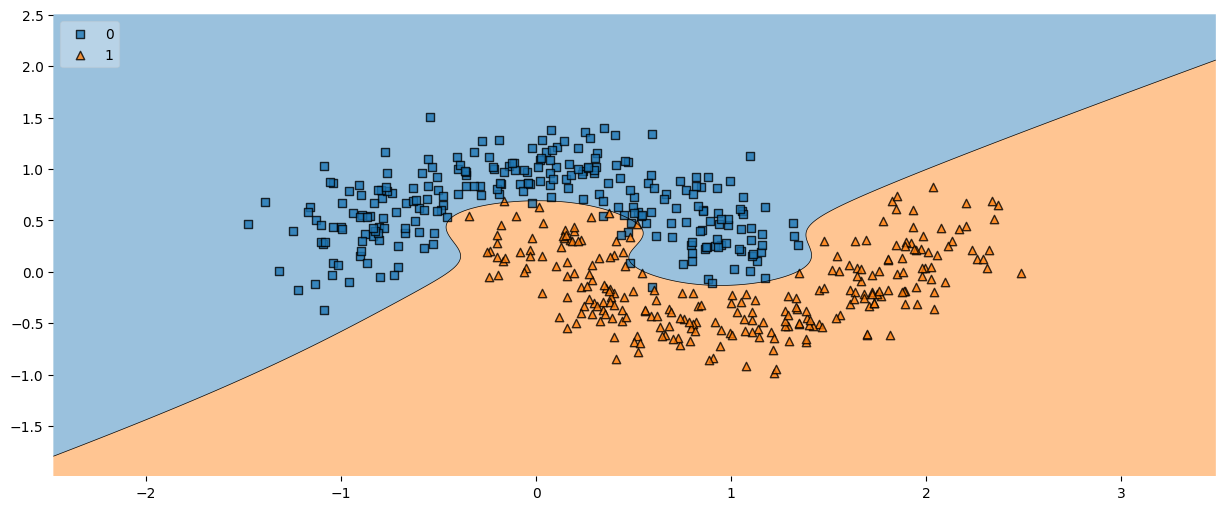

In [37]:
plt.figure(figsize = (15, 6))
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)
plt.show()

> ### Xavier/Glorot initialization using Keras - `kernel_initializer`

In [38]:
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(10,activation='tanh',kernel_initializer= keras.initializers.GlorotNormal()))
model.add(Dense(10,activation='tanh',kernel_initializer= keras.initializers.GlorotNormal()))
model.add(Dense(10,activation='tanh',kernel_initializer= keras.initializers.GlorotNormal()))
model.add(Dense(10,activation='tanh',kernel_initializer= keras.initializers.GlorotNormal()))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X, y, epochs=500, validation_split=0.2, verbose = 0)

28125/28125 ━━━━━━━━━━━━━━━━━━━━ 31s 1ms/step


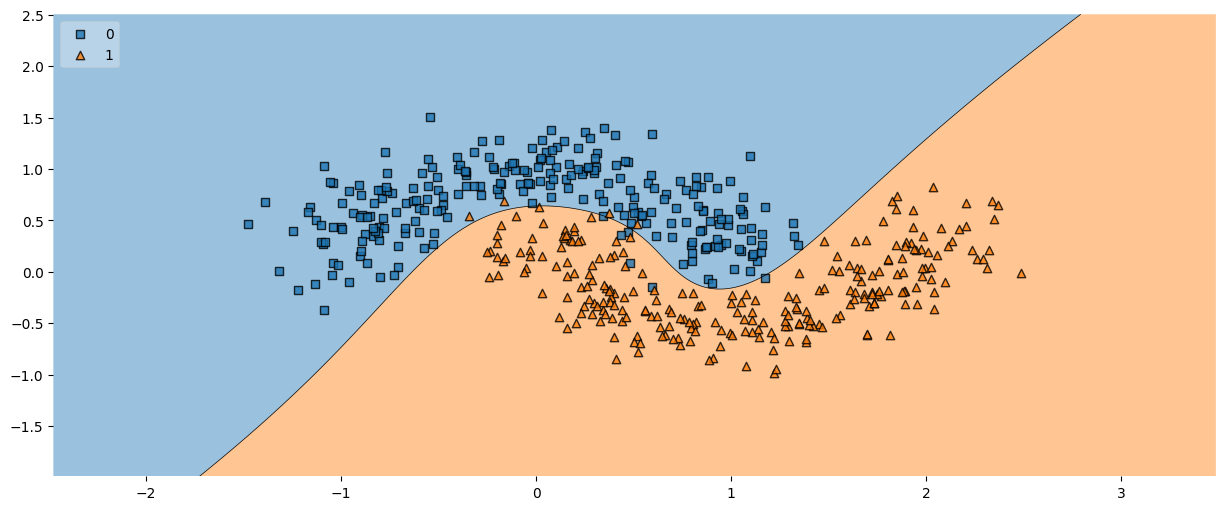

In [41]:
plt.figure(figsize = (15, 6))
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)
plt.show()

> Default - kernel_initializer= keras.initializers.GlorotUniform()
<br>
<hr>

> ## **He Initialization**
> He Initialization is a technique designed to improve the training of neural networks, particularly those using the ReLU (Rectified Linear Unit) activation function. It addresses some of the issues that arise with weight initialization by scaling the weights appropriately.
<br><br>
> He Initialization, developed by Kaiming He and his colleagues, is specifically tailored for layers with ReLU activations. It aims to prevent issues with gradient magnitude that can arise during training, such as vanishing or exploding gradients.

> ### **How It Works**
> 1. **Variance Scaling:** He Initialization sets the weights with a variance that is scaled according to the number of input neurons to the layer. Specifically, it draws weights from a distribution with a variance of `6 / fan_in`, where fan_in is the number of input neurons (or units) to the layer.

> ### **Why It’s Effective**
> 1. **Addressing ReLU's Behavior:** ReLU activation functions output zero for any negative input values. Since ReLU activations are zero for half of their input space, this means that the effective variance of activations is halved. He Initialization compensates for this by scaling the variance of the weights to be larger, which helps maintain a stable gradient flow during training.
<br><br>
> 2. **Gradient Stability:** By appropriately scaling the weights, He Initialization helps ensure that gradients remain at a reasonable magnitude throughout the network, avoiding the vanishing or exploding gradient problems. This promotes more stable and efficient training.

> #### **When to Use**
> He Initialization is particularly effective for neural networks that use ReLU or its variants (like Leaky ReLU or Parametric ReLU) as activation functions.

In [45]:
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(10,activation='relu',kernel_initializer= keras.initializers.HeNormal()))
model.add(Dense(10,activation='relu',kernel_initializer= keras.initializers.HeNormal()))
model.add(Dense(10,activation='relu',kernel_initializer= keras.initializers.HeNormal()))
model.add(Dense(10,activation='relu',kernel_initializer= keras.initializers.HeNormal()))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.get_weights()

[array([[ 0.29403722,  0.7460445 , -2.0626903 ,  1.0628828 , -1.0797243 ,
          0.2330885 , -0.7832788 , -0.72917354,  0.6617006 ,  0.72813505],
        [-1.2486148 , -1.0524284 ,  0.36281273, -0.7940452 ,  1.3657746 ,
          0.24432959,  0.38737586,  1.3708564 , -0.28625205,  0.47918305]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-7.19843030e-01,  2.51407206e-01,  1.64352357e-01,
         -1.43438458e-01, -7.32214987e-01, -3.18536848e-01,
         -1.19146975e-02, -4.59361851e-01, -1.60438091e-01,
         -1.60313435e-02],
        [-5.36311746e-01, -9.44952130e-01, -4.89264727e-01,
          4.01328236e-01,  5.50468385e-01, -6.56224266e-02,
         -4.61463213e-01,  3.06642026e-01, -7.38879859e-01,
          2.92470008e-01],
        [-5.81209838e-01, -1.06050715e-01,  1.77228600e-01,
          5.63506246e-01,  2.49390621e-02,  4.75083113e-01,
         -5.05681753e-01,  5.72513044e-01, -4.74567376e-02,
         -6.5403854

In [48]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X, y, epochs=500, validation_split=0.2, verbose = 0)

model.get_weights()

[array([[-1.9022671e-03,  1.0337467e+00, -2.8752542e+00,  1.4416863e+00,
         -1.2057866e+00,  8.0877453e-01, -1.0005612e+00, -1.5384869e-01,
          1.0018713e+00,  8.2233208e-01],
        [-2.2432511e+00, -1.1137028e+00,  3.0463278e-01, -9.1411585e-01,
          1.2800215e+00,  9.9402124e-01,  5.3505927e-01,  1.8934096e+00,
         -2.2013199e-01,  8.6201251e-02]], dtype=float32),
 array([-0.28372937, -0.3801529 , -0.27832332, -0.32011348, -0.3824165 ,
        -0.27105117,  0.43204623, -0.24875474,  0.3994797 ,  0.8268052 ],
       dtype=float32),
 array([[-1.7917331 ,  0.30599535, -0.8179508 ,  0.48142976, -0.38352793,
          0.5275647 ,  1.6675973 , -0.22918598, -0.5063702 , -1.1044539 ],
        [-1.1477497 , -1.4621116 , -0.5786698 ,  0.9187428 ,  0.4135474 ,
          0.45185128,  0.57135624,  0.13371877, -0.99723595,  0.07731346],
        [-1.6101418 , -0.18015917, -0.08539737,  1.0477787 ,  0.47849086,
          0.34196177,  0.13276727,  0.70135343,  0.3684356 , -0.8

28125/28125 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step


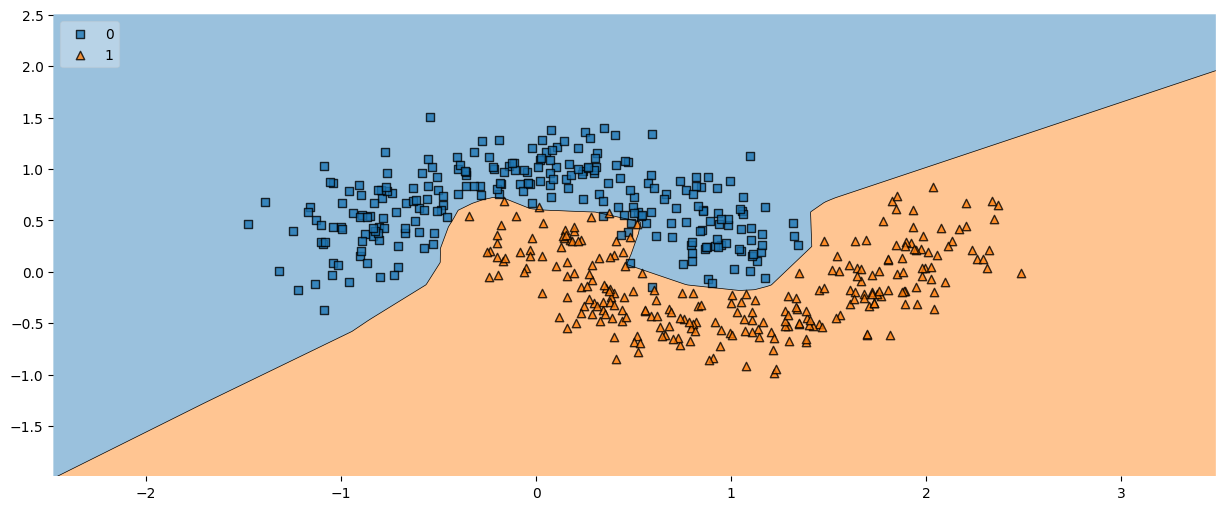

In [49]:
plt.figure(figsize = (15, 6))
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)
plt.show()